# Problem Statement


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1: Reading and Understanding the Data

Let us first 

- import NumPy and Pandas

- read the 'Day' dataset

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [3]:
# Reading the data set
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# checkinng the null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Observation: 
There are no null values in the data set

In [7]:
# Renaming the columns
df.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dropping unwanted columns

- 'instant' : it is an index column
- 'dtedat' : it contains the same information in both 'year' and 'month' column
- 'casual' & 'registered': 'count'='casual'+'registered' and count is our target variable so we will not consider casual and registered

In [8]:
# we can see that instant is an index column so we drop it
df.drop(['instant'],axis=1,inplace=True)

In [9]:
# In the data set the columns 'dteday' and 'year','month' are having same data so we can drop 'dteday' to avoid confusion
df.drop(['dteday'],axis=1,inplace=True)

In [10]:
# Here the count = casual + registered and count is our target variable so we will not consider casual and registered
df.drop(['casual','registered'],axis=1,inplace=True)

In [11]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Observation:

Here we can see that the columns season, year, month, holiday, weekday, workingday, weathersit are categorical variables

Replacing the 
- season
- weathersit 
- weekday

coulmns with appropriate values

In [13]:
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

In [14]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
#Convert variables to object type
df['month'] = df['month'].astype(object)
df['season'] = df['season'].astype(object)
df['weathersit'] = df['weathersit'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [16]:
# rounding the values in the columns 'temp', 'atemp', 'humidity', 'windspeed' to 3 decimal places
col_list = ['temp', 'atemp', 'humidity', 'windspeed']
def decimal(x):
    return round(x, 3)
df[col_list] = df[col_list].apply(decimal)

In [17]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,1,0,Monday,1,Mist_cloudy,14.111,18.181,80.583,10.750,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.903,17.687,69.609,16.652,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.051,9.470,43.727,16.637,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200,10.606,59.044,10.740,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305,11.464,43.696,12.522,1600


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Data Visualisation

In [19]:
# importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Data Visualisation of Numeric Variable

<Figure size 216x360 with 0 Axes>

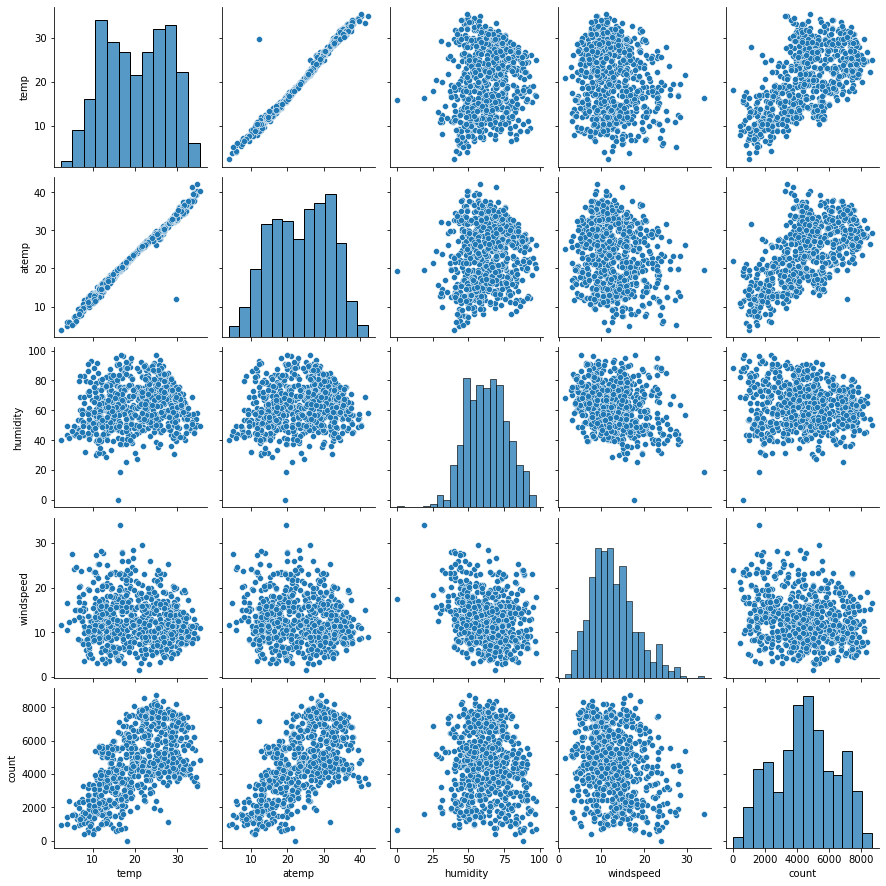

In [20]:
plt.figure(figsize = (3,5))
sns.pairplot(df, vars = ['temp','atemp','humidity','windspeed',"count"])
plt.show()

#### Observation:

- we can see that 'temp' and 'atemp' have a relationship
- and the Target variable 'count' has a linear relatioship with both 'temp' and 'atemp'

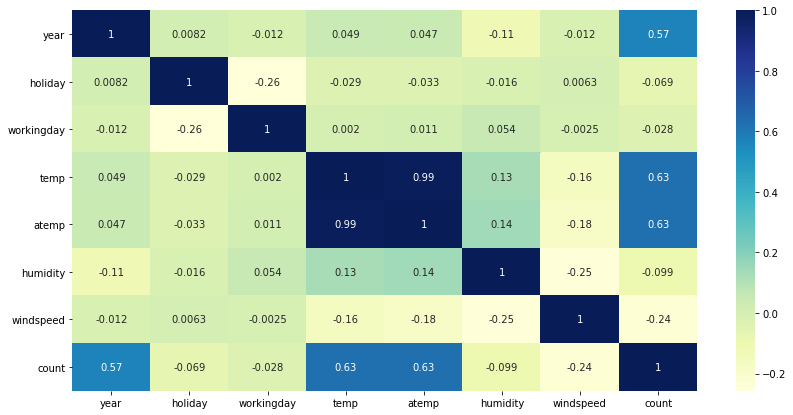

In [21]:
# checking the correlation
plt.figure(figsize = (14, 7))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observation:

- Target variable 'count' has a positive correlation with 
    
    - 'temp', 'atemp', 'year' and 'month' variables
    
- negative correlation with 

    - 'windspeed', 'humidity', 'holiday', 'workingday'
    
- 'temp' and 'atemp' have positive correlation of 0.99 

- 'temp' and 'atemp' have positive correlation with 'humidity'


In [22]:
#correlation between 'temp' and 'atemp' is 0.99 which is almost 1
#Let us drop 'atemp' and keep 'temp'
df.drop(['atemp'],axis=1,inplace=True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,1,0,Monday,1,Mist_cloudy,14.111,80.583,10.750,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.903,69.609,16.652,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.051,43.727,16.637,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200,59.044,10.740,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305,43.696,12.522,1600


### Data Visualisation on Categorical variables

Ploting the boxplot of categorical variables

- season
- year
- month
- workingday
- weathersit
- weekday
- holiday

against the Target variable 'Count'

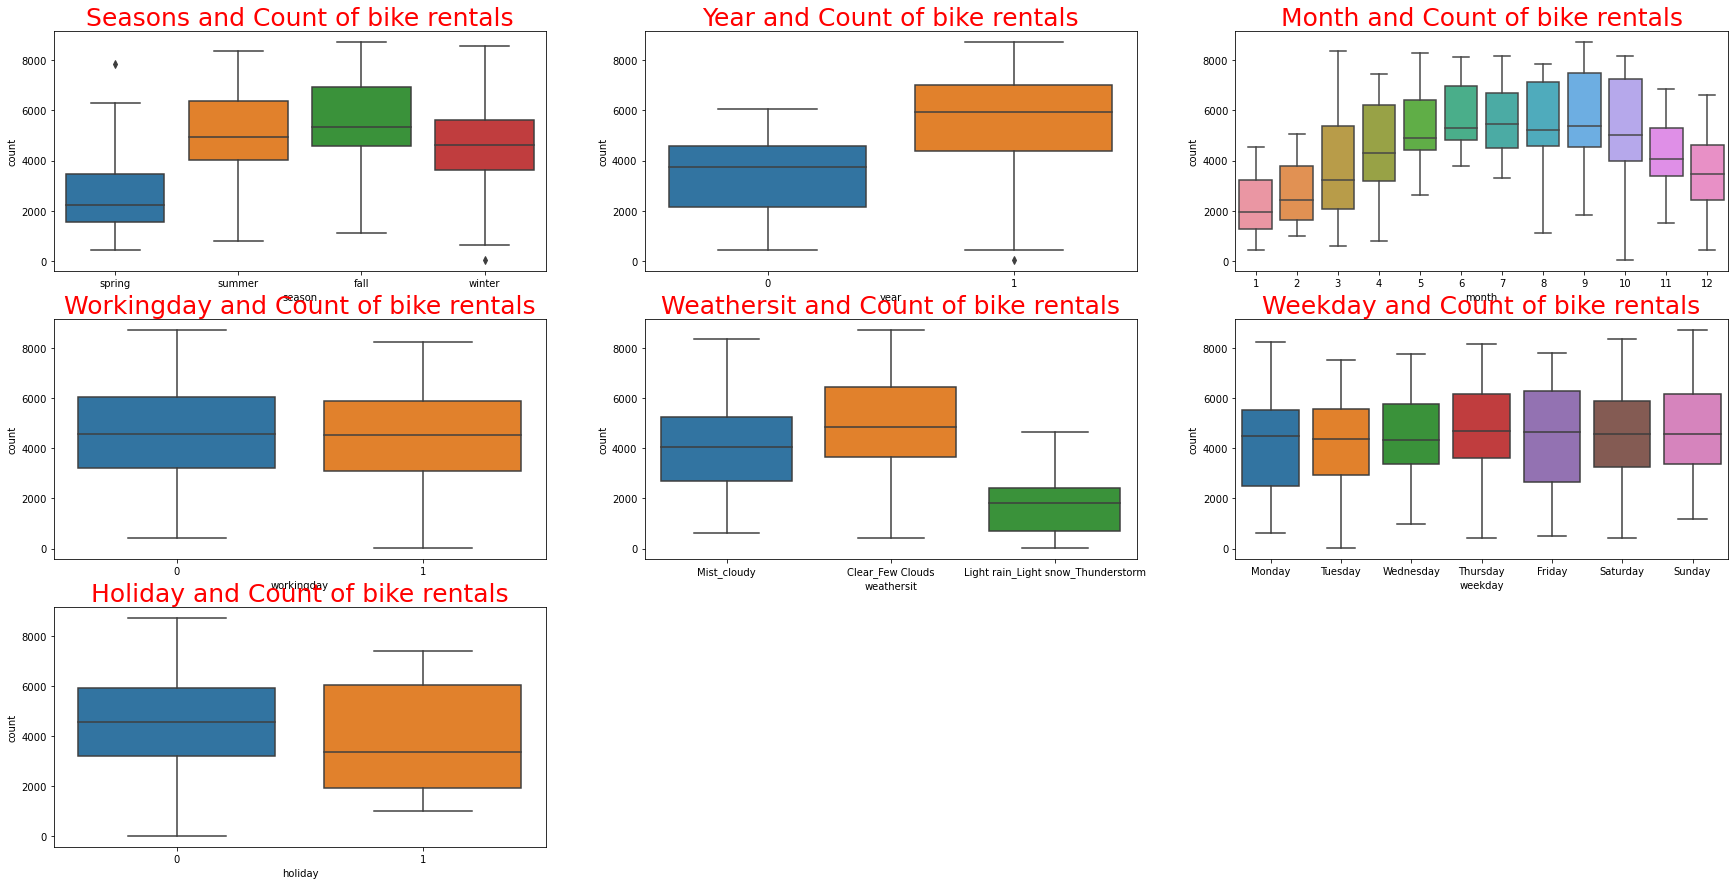

In [23]:
plt.figure(figsize=(30, 15))

plt.subplot(3,3,1)
plt.title('Seasons and Count of bike rentals', fontsize='25', color= 'r')
sns.boxplot(x = 'season', y = 'count', data = df)

plt.subplot(3,3,2)
plt.title('Year and Count of bike rentals', fontsize='25', color= 'r')
sns.boxplot(x = 'year', y = 'count', data = df)

plt.subplot(3,3,3)
plt.title('Month and Count of bike rentals', fontsize='25', color= 'r')
sns.boxplot(x = 'month', y = 'count', data = df)

plt.subplot(3,3,4)
plt.title('Workingday and Count of bike rentals', fontsize='25', color= 'r')
sns.boxplot(x = 'workingday', y = 'count', data = df)

plt.subplot(3,3,5)
plt.title('Weathersit and Count of bike rentals', fontsize='25', color= 'r')
sns.boxplot(x = 'weathersit', y = 'count', data = df)

plt.subplot(3,3,6)
plt.title('Weekday and Count of bike rentals', fontsize='25', color= 'r')
sns.boxplot(x = 'weekday', y = 'count', data = df)

plt.subplot(3,3,7)
plt.title('Holiday and Count of bike rentals', fontsize='25', color= 'r')
sns.boxplot(x = 'holiday', y = 'count', data = df)

plt.show()

#### Observation:

- **Seasons and Count of bike rentals**

    - Out of the 4 seasons there is a large decline in the Bike rentals in **"Spring"** Season
    - Greater number of Bike rentals : **"Fall" (Autumn)** Season
    
 
- **Year and Count of bike rentals**

    - The Bike rental is considerably higher in the year 2019 than 2018
    
    
- **Month and Count of bike rentals** 

    - There is an increase in Bike rentals from the month "January" to "July" and then from "Auguest" to "December" the renting count is decreasing.
    - The rental count in the month "Auguest" is slightly less than the next month "September"
    - The more number of Bike rentals are happened in "July"
    - Lesser number of Bike rentals are happened in "January" month 
    

- **Workingday and Count of bike rentals**

    - The count of Bike rentals in both working and non-working day are almost same, there is only a slight difference between the two    
    
    
- **Weathersit and Count of bike rentals**

    - Count of Bike rentals is 
        
        - High : "Clear_Few Clouds" weather
        - Low : "Light rain_Light snow_Thunderstorm" weather and there is a considerble decline in the Rental count in this weather than the other 2
        
        
- **Weekday and Count of bike rentals**

    - Count of Bike rentals is 
    
        - High : "Thursday"
        - Low : "Wednesday"
        - There is only a slight difference in the rental counts in all the 7 days
        
        
- **Holiday and Count of bike rentals**

    - The count of rental count is high in non-holydays
    - Low in Holydays
    - The rental count is more consistent in non-holidays
        

## Step 3: Data Preparation

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


### Creating Dummy variables for the Categorical variables

   - season
   - month
   - weekday
   - weathersit

In [25]:
# Creating dummies
season_dummies = pd.get_dummies(df['season'], drop_first = True)
month_dummies = pd.get_dummies(df['month'], drop_first = True)
weekday_dummies = pd.get_dummies(df['weekday'], drop_first = True)
weathersit_dummies = pd.get_dummies(df['weathersit'], drop_first = True)

In [26]:
# Concating these dummies with the original data
df = pd.concat([df, season_dummies],axis=1)
df=pd.concat([df,month_dummies],axis=1)
df=pd.concat([df,weekday_dummies],axis=1)
df=pd.concat([df,weathersit_dummies],axis=1)

In [27]:
# dropping the original colums season, month, weekday, weathersit
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)
df.drop(['weekday'],axis=1,inplace=True)
df.drop(['month'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                730 non-null    int64  
 1   holiday                             730 non-null    int64  
 2   workingday                          730 non-null    int64  
 3   temp                                730 non-null    float64
 4   humidity                            730 non-null    float64
 5   windspeed                           730 non-null    float64
 6   count                               730 non-null    int64  
 7   spring                              730 non-null    uint8  
 8   summer                              730 non-null    uint8  
 9   winter                              730 non-null    uint8  
 10  2                                   730 non-null    uint8  
 11  3                                   730 non-n

In [28]:
df.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,2,3,4,5,6,7,8,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,0,0,1,14.111,80.583,10.750,985,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.903,69.609,16.652,801,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.051,43.727,16.637,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200,59.044,10.740,1562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305,43.696,12.522,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,2,3,4,5,6,7,8,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
653,1,0,1,19.202,55.833,12.209,7534,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.247,70.417,11.083,7216,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.981,62.125,10.792,4066,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489,48.333,23.501,1796,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443,48.958,8.708,4220,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [31]:
df_test.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,2,3,4,5,6,7,8,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
184,0,1,0,29.793,63.792,5.459,6043,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.083,59.208,7.625,6211,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270,81.292,13.250,2659,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433,42.417,13.417,4780,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315,30.500,19.583,4968,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Observation:

Here we can see that all variables are not in the different scale. So, rescaling the variables so that they have a comparable scale

### Rescaling the Features 

We are using "Min-Max scaling"

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
variables = ['temp', 'humidity', 'windspeed', 'count']
df_train[variables] = scaler.fit_transform(df_train[variables])
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,2,3,4,5,6,7,8,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
653,1,0,1,0.509908,0.575349,0.300809,0.864243,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815190,0.725634,0.264679,0.827658,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442408,0.640187,0.255342,0.465255,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245107,0.498063,0.663126,0.204096,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504503,0.188475,0.482973,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [34]:
df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,2,3,4,5,6,7,8,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537273,0.650367,0.320776,0.513620,0.243137,0.245098,0.24902,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225843,0.145882,0.169795,0.224593,0.429398,0.430568,0.43287,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339860,0.538640,0.199191,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540527,0.653712,0.296782,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735230,0.754830,0.414450,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observations:

Here we can see that for all variables

   - min = 0
   - max = 1
   
So, every variable in the train data is in comparable scale

### Dividing into X and Y sets for the model building

In [35]:
# creating X and y
y_train = df_train.pop('count')
X_train = df_train

In [36]:
X_train.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,2,3,4,5,6,7,8,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
653,1,0,1,0.509908,0.575349,0.300809,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815190,0.725634,0.264679,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442408,0.640187,0.255342,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245107,0.498063,0.663126,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504503,0.188475,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [37]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

## Step 5: Building a linear model

Using **RFE (Recursive feature elimination)** to select the features and using mixed approch to build the model

In [38]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
#The total number of columns we have 
len(df_train.columns)

28

In [40]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 (2, False, 9),
 (3, True, 1),
 (4, False, 2),
 (5, True, 1),
 (6, False, 3),
 (7, False, 10),
 (8, True, 1),
 (9, True, 1),
 (10, True, 1),
 (11, False, 11),
 (12, False, 12),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 13),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1)]

In [42]:
col = X_train.columns[rfe.support_]
col

Index([                              'year',
                                  'holiday',
                                     'temp',
                                 'humidity',
                                'windspeed',
                                   'spring',
                                   'summer',
                                   'winter',
                                          3,
                                          5,
                                          8,
                                          9,
                                         10,
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy'],
      dtype='object')

Using these 15 variables we are building our model

In [43]:
X_train.columns[~rfe.support_]

Index(['workingday',            2,            4,            6,            7,
                 11,           12,     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday'],
      dtype='object')

These are the variables we are not using for the model building

In [44]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,year,holiday,temp,humidity,windspeed,spring,summer,winter,3,5,8,9,10,Light rain_Light snow_Thunderstorm,Mist_cloudy
653,1,0,0.509908,0.575349,0.300809,0,0,1,0,0,0,0,1,0,0
576,1,0,0.815190,0.725634,0.264679,0,0,0,0,0,0,0,0,0,0
426,1,0,0.442408,0.640187,0.255342,1,0,0,1,0,0,0,0,0,1
728,1,0,0.245107,0.498063,0.663126,1,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504503,0.188475,0,1,0,0,0,0,0,0,0,1


#### Building a Model using statsmodel:

In [45]:
# adding constant to the independent variables
import statsmodels.api as sm  
X_train_rfe_0 = sm.add_constant(X_train_rfe)

In [46]:
# Running the linear model
lm0 = sm.OLS(y_train,X_train_rfe_0).fit()   

In [47]:
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          2.95e-189
Time:                        20:40:37   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### Observation:

from the summary of linear model we can see that 

- p-values of the month 5 and spring is > 0.05)
- R-squared: 0.846

In [48]:
# Evaluating the Variable inflation factor of the feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

def find_vif():
    
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [49]:
find_vif()

,Features,VIF
3,humidity,29.50
2,temp,15.39
4,windspeed,4.77
5,spring,4.72
7,winter,4.33
6,summer,3.85
14,Mist_cloudy,2.29
0,year,2.10
10,8,1.80
9,5,1.64


#### Observation:

We can see that the VIF for "humidity" is very high

In [50]:
# we are dropping the month "5" since it has high p value
X_train_rfe = X_train_rfe.drop([5],axis=1)

In [51]:
# adding constant to the independent variables
import statsmodels.api as sm  
X_train_rfe_1 = sm.add_constant(X_train_rfe)

# Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe_1).fit() 

In [52]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          9.02e-190
Time:                        20:40:38   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### Observation:

from the summary of linear model we can see that

- here the season spring is insignificant since it has high p value 0.106 > 0.05
- R-squared:  0.845

In [53]:
# Evaluating the VIF
find_vif()

,Features,VIF
3,humidity,29.49
2,temp,15.32
5,spring,4.70
4,windspeed,4.69
7,winter,4.33
6,summer,3.26
13,Mist_cloudy,2.29
0,year,2.09
9,8,1.80
11,10,1.61


#### Observation:

We can see that the VIF for "humidity" is high

In [54]:
# we are dropping "spring" season since it has high p value 
X_train_rfe = X_train_rfe.drop(['spring'],axis=1)

In [55]:
# adding constant to the independent variables
import statsmodels.api as sm  
X_train_rfe_2 = sm.add_constant(X_train_rfe)

# Running the linear model
lm2 = sm.OLS(y_train,X_train_rfe_2).fit()

In [56]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          2.26e-190
Time:                        20:40:38   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### Observation:

from the summary of linear model we can see that

- here the month 3 is insignificant since it has a p value of 0.093
- R-squared:   0.844

In [57]:
find_vif()

,Features,VIF
3,humidity,14.75
2,temp,10.01
4,windspeed,3.69
6,winter,2.34
12,Mist_cloudy,2.14
0,year,2.02
5,summer,1.83
8,8,1.61
10,10,1.61
9,9,1.34


In [58]:
# we are dropping the month "3" since it has high p value
X_train_rfe = X_train_rfe.drop([3],axis=1)

In [59]:
# adding constant to the independent variables
import statsmodels.api as sm  
X_train_rfe_3 = sm.add_constant(X_train_rfe)

# Running the linear model
lm3 = sm.OLS(y_train,X_train_rfe_3).fit() 

In [60]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          6.03e-191
Time:                        20:40:38   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### Observation:

from the summary of linear model we can see that

- here all of the elements have p value < 0.05 and hence significant
- R-squared:   0.843

In [61]:
find_vif()

,Features,VIF
3,humidity,14.41
2,temp,9.88
4,windspeed,3.59
6,winter,2.27
11,Mist_cloudy,2.13
0,year,2.02
5,summer,1.83
9,10,1.61
7,8,1.60
8,9,1.34


In [62]:
# we are dropping "humidity" since it has high VIF
X_train_rfe = X_train_rfe.drop(['humidity'],axis=1)

In [63]:
# adding constant to the independent variables
import statsmodels.api as sm  
X_train_rfe_4 = sm.add_constant(X_train_rfe)

# Running the linear model
lm4 = sm.OLS(y_train,X_train_rfe_4).fit()

In [64]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          3.22e-187
Time:                        20:40:38   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### Observation:

- Month 10 has high p value of 0.054 > 0.05

In [65]:
find_vif()

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,year,2.00
5,winter,1.95
4,summer,1.82
8,10,1.60
6,8,1.59
10,Mist_cloudy,1.49
7,9,1.34
9,Light rain_Light snow_Thunderstorm,1.09


In [66]:
# we are dropping the month 10 since it has high p value 
X_train_rfe = X_train_rfe.drop([10],axis=1)

In [67]:
# adding constant to the independent variables
import statsmodels.api as sm  
X_train_rfe_5 = sm.add_constant(X_train_rfe)

# Running the linear model
lm5 = sm.OLS(y_train,X_train_rfe_5).fit()

In [68]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.26e-187
Time:                        20:40:38   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [69]:
find_vif()

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,year,2.00
4,summer,1.81
6,8,1.58
5,winter,1.49
9,Mist_cloudy,1.48
7,9,1.31
8,Light rain_Light snow_Thunderstorm,1.08
1,holiday,1.04


In [70]:
# we are dropping "temp" since it has high VIF
X_train_rfe = X_train_rfe.drop(['temp'],axis=1)

In [71]:
X_train_rfe_6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe_6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          5.01e-108
Time:                        20:40:38   Log-Likelihood:                 306.23
No. Observations:                 510   AIC:                            -592.5
Df Residuals:                     500   BIC:                            -550.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### Observation:

- Here when I removed 'temp' variable from the data set, there is a huge decline of R2 value to **65% from 83.4%**
- It imply that "temp" is a significant variable and can't be removed

In [72]:
#Adding "temp" to the data set again 
X_train_rfe['temp']=X_train['temp']
X_train_rfe.head()

,year,holiday,windspeed,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp
653,1,0,0.300809,0,1,0,0,0,0,0.509908
576,1,0,0.264679,0,0,0,0,0,0,0.815190
426,1,0,0.255342,0,0,0,0,0,1,0.442408
728,1,0,0.663126,0,0,0,0,0,0,0.245107
482,1,0,0.188475,1,0,0,0,0,1,0.395666


In [73]:
# again building the model with "temp" variable
X_train_rfe_7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe_7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.26e-187
Time:                        20:40:39   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [74]:
find_vif()

,Features,VIF
9,temp,5.01
2,windspeed,3.10
0,year,2.00
3,summer,1.81
5,8,1.58
4,winter,1.49
8,Mist_cloudy,1.48
6,9,1.31
7,Light rain_Light snow_Thunderstorm,1.08
1,holiday,1.04


In [75]:
# we are dropping "windspeed" since it has high VIF (> 2)
X_train_rfe = X_train_rfe.drop(['windspeed'],axis=1)

In [76]:
X_train_rfe_8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe_8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.99e-181
Time:                        20:40:39   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [77]:
find_vif()

,Features,VIF
8,temp,3.92
0,year,1.94
2,summer,1.78
4,8,1.56
3,winter,1.47
7,Mist_cloudy,1.44
5,9,1.29
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


#### Observation:

- here we can see that other than "temp" all the variables have VIF < 2
- p-value of all variable is < 0.05, hence significant

Adding the deleted features to the data set, 

**['workingday', 2, 4, 6, 7, 11, 12, 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],**
      
that is the features we didn't add to the data set to build the model, to check if the model improves**

In [78]:
#Adding "workingday" to the data set and check if it improves the model
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,workingday
653,1,0,0,1,0,0,0,0,0.509908,1
576,1,0,0,0,0,0,0,0,0.815190,1
426,1,0,0,0,0,0,0,1,0.442408,0
728,1,0,0,0,0,0,0,0,0.245107,1
482,1,0,1,0,0,0,0,1,0.395666,0


In [79]:
X_train_rfe_9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe_9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.2
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          2.72e-181
Time:                        20:40:39   Log-Likelihood:                 482.01
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [80]:
find_vif()

,Features,VIF
8,temp,5.08
9,workingday,2.90
0,year,1.97
2,summer,1.79
4,8,1.56
3,winter,1.54
7,Mist_cloudy,1.45
5,9,1.29
1,holiday,1.06
6,Light rain_Light snow_Thunderstorm,1.06


In [81]:
# we are dropping "workingday" since it has high VIF (> 2)
X_train_rfe = X_train_rfe.drop(['workingday'],axis=1)

In [82]:
X_train_rfe_10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe_10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.99e-181
Time:                        20:40:39   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [83]:
find_vif()

,Features,VIF
8,temp,3.92
0,year,1.94
2,summer,1.78
4,8,1.56
3,winter,1.47
7,Mist_cloudy,1.44
5,9,1.29
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


In [84]:
#Adding "saturday" to the data set and check if it improves the model
X_train_rfe['Saturday'] = X_train['Saturday']
X_train_rfe.head()

,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,Saturday
653,1,0,0,1,0,0,0,0,0.509908,0
576,1,0,0,0,0,0,0,0,0.815190,0
426,1,0,0,0,0,0,0,1,0.442408,0
728,1,0,0,0,0,0,0,0,0.245107,0
482,1,0,1,0,0,0,0,1,0.395666,0


In [85]:
X_train_rfe_11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe_11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     232.0
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.82e-180
Time:                        20:40:39   Log-Likelihood:                 480.06
No. Observations:                 510   AIC:                            -938.1
Df Residuals:                     499   BIC:                            -891.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [86]:
find_vif()

,Features,VIF
8,temp,4.00
0,year,1.94
2,summer,1.78
4,8,1.56
3,winter,1.47
7,Mist_cloudy,1.45
5,9,1.29
9,Saturday,1.14
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


In [87]:
# we are dropping "Saturday" since it has high p-value (0.277)
X_train_rfe = X_train_rfe.drop(['Saturday'], axis=1)

In [88]:
X_train_rfe_12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe_12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.99e-181
Time:                        20:40:39   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [89]:
find_vif()

,Features,VIF
8,temp,3.92
0,year,1.94
2,summer,1.78
4,8,1.56
3,winter,1.47
7,Mist_cloudy,1.44
5,9,1.29
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


In [90]:
#Adding "Sunday" to the data set and check if it improves the model
X_train_rfe['Sunday'] = X_train['Sunday']
X_train_rfe.head()

,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,Sunday
653,1,0,0,1,0,0,0,0,0.509908,0
576,1,0,0,0,0,0,0,0,0.815190,0
426,1,0,0,0,0,0,0,1,0.442408,1
728,1,0,0,0,0,0,0,0,0.245107,0
482,1,0,1,0,0,0,0,1,0.395666,1


In [91]:
X_train_rfe_13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe_13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.9
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          8.00e-181
Time:                        20:40:40   Log-Likelihood:                 480.91
No. Observations:                 510   AIC:                            -939.8
Df Residuals:                     499   BIC:                            -893.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [92]:
find_vif()

,Features,VIF
8,temp,4.01
0,year,1.94
2,summer,1.78
4,8,1.56
3,winter,1.47
7,Mist_cloudy,1.46
5,9,1.29
9,Sunday,1.15
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


In [93]:
# we are dropping "Sunday" since it has high p value 0.092 > 0.05
X_train_rfe = X_train_rfe.drop(['Sunday'],axis=1)

In [94]:
X_train_rfe_14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe_14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.99e-181
Time:                        20:40:40   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [95]:
find_vif()

,Features,VIF
8,temp,3.92
0,year,1.94
2,summer,1.78
4,8,1.56
3,winter,1.47
7,Mist_cloudy,1.44
5,9,1.29
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


In [96]:
#Adding "7" (july) to the data set and check if it improves the model
X_train_rfe[7] = X_train[7]
X_train_rfe.head()

,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,7
653,1,0,0,1,0,0,0,0,0.509908,0
576,1,0,0,0,0,0,0,0,0.815190,1
426,1,0,0,0,0,0,0,1,0.442408,0
728,1,0,0,0,0,0,0,0,0.245107,0
482,1,0,1,0,0,0,0,1,0.395666,0


In [97]:
X_train_rfe_15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe_15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.4
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          3.18e-180
Time:                        20:40:40   Log-Likelihood:                 479.49
No. Observations:                 510   AIC:                            -937.0
Df Residuals:                     499   BIC:                            -890.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [98]:
find_vif()

,Features,VIF
8,temp,7.43
2,summer,2.50
4,8,2.11
9,7,2.04
0,year,1.96
3,winter,1.78
5,9,1.54
7,Mist_cloudy,1.45
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


In [99]:
# we are dropping "7"(july) since it has high p value (0.802)
X_train_rfe = X_train_rfe.drop([7],axis=1)

In [100]:
X_train_rfe_16 = sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe_16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.99e-181
Time:                        20:40:40   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [101]:
find_vif()

,Features,VIF
8,temp,3.92
0,year,1.94
2,summer,1.78
4,8,1.56
3,winter,1.47
7,Mist_cloudy,1.44
5,9,1.29
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


In [102]:
#Adding "11" to the data set and check if it improves the model
X_train_rfe[11]=X_train[11]
X_train_rfe.head()

,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,11
653,1,0,0,1,0,0,0,0,0.509908,0
576,1,0,0,0,0,0,0,0,0.815190,0
426,1,0,0,0,0,0,0,1,0.442408,0
728,1,0,0,0,0,0,0,0,0.245107,0
482,1,0,1,0,0,0,0,1,0.395666,0


In [103]:
X_train_rfe_17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe_17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     232.0
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.82e-180
Time:                        20:40:40   Log-Likelihood:                 480.06
No. Observations:                 510   AIC:                            -938.1
Df Residuals:                     499   BIC:                            -891.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [104]:
find_vif()

,Features,VIF
8,temp,3.92
3,winter,2.03
0,year,1.94
2,summer,1.78
9,11,1.57
4,8,1.56
7,Mist_cloudy,1.44
5,9,1.30
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.04


In [105]:
# we are dropping "11"(November) since it has high p value
X_train_rfe = X_train_rfe.drop([11],axis=1)

In [106]:
X_train_rfe_18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe_18).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.99e-181
Time:                        20:40:40   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [107]:
find_vif()

,Features,VIF
8,temp,3.92
0,year,1.94
2,summer,1.78
4,8,1.56
3,winter,1.47
7,Mist_cloudy,1.44
5,9,1.29
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


In [108]:
#Adding "12" to the data set and check if it improves the model
X_train_rfe[12]=X_train[12]
X_train_rfe.head()

,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,12
653,1,0,0,1,0,0,0,0,0.509908,0
576,1,0,0,0,0,0,0,0,0.815190,0
426,1,0,0,0,0,0,0,1,0.442408,0
728,1,0,0,0,0,0,0,0,0.245107,1
482,1,0,1,0,0,0,0,1,0.395666,0


In [109]:
X_train_rfe_19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe_19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          2.72e-180
Time:                        20:40:40   Log-Likelihood:                 479.65
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     499   BIC:                            -890.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [110]:
find_vif()

,Features,VIF
8,temp,3.92
0,year,1.94
2,summer,1.78
3,winter,1.63
4,8,1.56
7,Mist_cloudy,1.45
5,9,1.30
9,12,1.21
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


In [111]:
# we are dropping "12" (December) since it has high p value
X_train_rfe = X_train_rfe.drop([12],axis=1)

In [112]:
X_train_rfe_20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe_20).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.99e-181
Time:                        20:40:41   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [113]:
find_vif()

,Features,VIF
8,temp,3.92
0,year,1.94
2,summer,1.78
4,8,1.56
3,winter,1.47
7,Mist_cloudy,1.44
5,9,1.29
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


In [114]:
#Adding "2" to the data set and check if it improves the model
X_train_rfe[2]=X_train[2]
X_train_rfe.head()

,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,2
653,1,0,0,1,0,0,0,0,0.509908,0
576,1,0,0,0,0,0,0,0,0.815190,0
426,1,0,0,0,0,0,0,1,0.442408,0
728,1,0,0,0,0,0,0,0,0.245107,0
482,1,0,1,0,0,0,0,1,0.395666,0


In [115]:
X_train_rfe_21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe_21).fit()
print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.5
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          2.96e-180
Time:                        20:40:41   Log-Likelihood:                 479.56
No. Observations:                 510   AIC:                            -937.1
Df Residuals:                     499   BIC:                            -890.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [116]:
find_vif()

,Features,VIF
8,temp,3.97
0,year,1.97
2,summer,1.83
4,8,1.59
3,winter,1.50
7,Mist_cloudy,1.46
5,9,1.30
9,2,1.09
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.04


In [117]:
# we are dropping "2" (December) since it has high p value
X_train_rfe = X_train_rfe.drop([2],axis=1)

In [118]:
X_train_rfe_22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe_22).fit()
print(lm22.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.99e-181
Time:                        20:40:41   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [119]:
find_vif()

,Features,VIF
8,temp,3.92
0,year,1.94
2,summer,1.78
4,8,1.56
3,winter,1.47
7,Mist_cloudy,1.44
5,9,1.29
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


In [120]:
#Adding "Monday" to the data set and check if it improves the model
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,Monday
653,1,0,0,1,0,0,0,0,0.509908,0
576,1,0,0,0,0,0,0,0,0.815190,0
426,1,0,0,0,0,0,0,1,0.442408,0
728,1,0,0,0,0,0,0,0,0.245107,1
482,1,0,1,0,0,0,0,1,0.395666,0


In [121]:
X_train_rfe_23 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe_23).fit()
print(lm23.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.6
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          4.45e-181
Time:                        20:40:41   Log-Likelihood:                 481.51
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     499   BIC:                            -894.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [122]:
find_vif()

,Features,VIF
8,temp,4.02
0,year,1.94
2,summer,1.78
4,8,1.56
3,winter,1.48
7,Mist_cloudy,1.44
5,9,1.29
9,Monday,1.15
6,Light rain_Light snow_Thunderstorm,1.06
1,holiday,1.03


#### Observation:

Keeping "Monday" since 

- R2 increased to 0.824 from 0.823
- Adj R2 increased to 0.820 from 0.819
- it is significant (low p value)
- VIF < 2

In [123]:
#Adding "Tuesday" to the data set and check if it improves the model
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,Monday,Tuesday
653,1,0,0,1,0,0,0,0,0.509908,0,0
576,1,0,0,0,0,0,0,0,0.815190,0,0
426,1,0,0,0,0,0,0,1,0.442408,0,0
728,1,0,0,0,0,0,0,0,0.245107,1,0
482,1,0,1,0,0,0,0,1,0.395666,0,0


In [124]:
X_train_rfe_24 = sm.add_constant(X_train_rfe)
lm24 = sm.OLS(y_train,X_train_rfe_24).fit()
print(lm24.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.3
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.08e-181
Time:                        20:40:41   Log-Likelihood:                 485.80
No. Observations:                 510   AIC:                            -947.6
Df Residuals:                     498   BIC:                            -896.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [125]:
find_vif()

,Features,VIF
8,temp,4.19
0,year,1.95
2,summer,1.78
4,8,1.57
3,winter,1.49
7,Mist_cloudy,1.44
5,9,1.29
10,Tuesday,1.21
9,Monday,1.18
6,Light rain_Light snow_Thunderstorm,1.06


#### Onservation:

Keeping "Tuesday" since 

- R2 increased to 0.827 from 0.824
- Adj. R2 increased to 0.823 from 0.820
- it is significant (low p value)
- VIF < 2

In [126]:
#Adding "Wednesday" to the data set and check if it improves the model
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,Monday,Tuesday,Wednesday
653,1,0,0,1,0,0,0,0,0.509908,0,0,1
576,1,0,0,0,0,0,0,0,0.815190,0,0,1
426,1,0,0,0,0,0,0,1,0.442408,0,0,0
728,1,0,0,0,0,0,0,0,0.245107,1,0,0
482,1,0,1,0,0,0,0,1,0.395666,0,0,0


In [127]:
X_train_rfe_25 = sm.add_constant(X_train_rfe)
lm25 = sm.OLS(y_train,X_train_rfe_25).fit()
print(lm25.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.2
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.17e-180
Time:                        20:40:41   Log-Likelihood:                 486.14
No. Observations:                 510   AIC:                            -946.3
Df Residuals:                     497   BIC:                            -891.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [128]:
find_vif()

,Features,VIF
8,temp,4.27
0,year,1.95
2,summer,1.78
4,8,1.57
3,winter,1.51
7,Mist_cloudy,1.45
5,9,1.29
10,Tuesday,1.26
11,Wednesday,1.25
9,Monday,1.22


In [129]:
# we are dropping Wednesday since it has high p value
X_train_rfe = X_train_rfe.drop(['Wednesday'],axis=1)

In [130]:
X_train_rfe_26 = sm.add_constant(X_train_rfe)
lm26 = sm.OLS(y_train,X_train_rfe_25).fit()
print(lm26.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.2
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.17e-180
Time:                        20:40:42   Log-Likelihood:                 486.14
No. Observations:                 510   AIC:                            -946.3
Df Residuals:                     497   BIC:                            -891.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [131]:
#Adding "Thursday" to the data set and check if it improves the model
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,Monday,Tuesday,Thursday
653,1,0,0,1,0,0,0,0,0.509908,0,0,0
576,1,0,0,0,0,0,0,0,0.815190,0,0,0
426,1,0,0,0,0,0,0,1,0.442408,0,0,0
728,1,0,0,0,0,0,0,0,0.245107,1,0,0
482,1,0,1,0,0,0,0,1,0.395666,0,0,0


In [132]:
X_train_rfe_27 = sm.add_constant(X_train_rfe)
lm27 = sm.OLS(y_train,X_train_rfe_27).fit()
print(lm27.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.56e-180
Time:                        20:40:42   Log-Likelihood:                 485.84
No. Observations:                 510   AIC:                            -945.7
Df Residuals:                     497   BIC:                            -890.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [133]:
# we are dropping Thursday since it has high p value
X_train_rfe = X_train_rfe.drop(['Thursday'],axis=1)

In [134]:
X_train_rfe_28 = sm.add_constant(X_train_rfe)
lm28 = sm.OLS(y_train,X_train_rfe_28).fit()
print(lm28.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.3
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.08e-181
Time:                        20:40:42   Log-Likelihood:                 485.80
No. Observations:                 510   AIC:                            -947.6
Df Residuals:                     498   BIC:                            -896.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [135]:
#Adding month "6" to the data set and check if it improves the model
X_train_rfe[6]=X_train[6]
X_train_rfe.head()

,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,Monday,Tuesday,6
653,1,0,0,1,0,0,0,0,0.509908,0,0,0
576,1,0,0,0,0,0,0,0,0.815190,0,0,0
426,1,0,0,0,0,0,0,1,0.442408,0,0,0
728,1,0,0,0,0,0,0,0,0.245107,1,0,0
482,1,0,1,0,0,0,0,1,0.395666,0,0,0


In [136]:
X_train_rfe_29 = sm.add_constant(X_train_rfe)
lm29 = sm.OLS(y_train,X_train_rfe_28).fit()
print(lm29.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.3
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.08e-181
Time:                        20:40:42   Log-Likelihood:                 485.80
No. Observations:                 510   AIC:                            -947.6
Df Residuals:                     498   BIC:                            -896.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [137]:
find_vif()

,Features,VIF
8,temp,4.79
0,year,1.96
2,summer,1.79
4,8,1.65
3,winter,1.52
7,Mist_cloudy,1.46
11,6,1.33
5,9,1.32
10,Tuesday,1.21
9,Monday,1.18


#### Observation:

- Eventhough the p-value and VIF value of Month 6 are in the acceptable range, there is no change in the values of either R2 or Adjusted R2 from the previous model therefore dropping the month 6 

In [144]:
# we are dropping month 6 since it has no significance and it doesn't improves the model
X_train_rfe = X_train_rfe.drop([6],axis=1)

In [145]:
X_train_rfe_30 = sm.add_constant(X_train_rfe)
lm30 = sm.OLS(y_train,X_train_rfe_30).fit()
print(lm30.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.3
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.08e-181
Time:                        20:49:32   Log-Likelihood:                 485.80
No. Observations:                 510   AIC:                            -947.6
Df Residuals:                     498   BIC:                            -896.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [146]:
#Adding month "4" to the data set and check if it improves the model
X_train_rfe[4]=X_train[4]
X_train_rfe.head()

,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,Monday,Tuesday,4
653,1,0,0,1,0,0,0,0,0.509908,0,0,0
576,1,0,0,0,0,0,0,0,0.815190,0,0,0
426,1,0,0,0,0,0,0,1,0.442408,0,0,0
728,1,0,0,0,0,0,0,0,0.245107,1,0,0
482,1,0,1,0,0,0,0,1,0.395666,0,0,1


In [147]:
X_train_rfe_31 = sm.add_constant(X_train_rfe)
lm31 = sm.OLS(y_train,X_train_rfe_31).fit()
print(lm31.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.55e-180
Time:                        20:51:11   Log-Likelihood:                 485.85
No. Observations:                 510   AIC:                            -945.7
Df Residuals:                     497   BIC:                            -890.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [148]:
# we are dropping month 4 since it has high p-value
X_train_rfe = X_train_rfe.drop([4],axis=1)

In [149]:
X_train_rfe_32 = sm.add_constant(X_train_rfe)
lm32 = sm.OLS(y_train,X_train_rfe_32).fit()
print(lm32.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.3
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.08e-181
Time:                        20:52:24   Log-Likelihood:                 485.80
No. Observations:                 510   AIC:                            -947.6
Df Residuals:                     498   BIC:                            -896.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [150]:
find_vif()

,Features,VIF
8,temp,4.19
0,year,1.95
2,summer,1.78
4,8,1.57
3,winter,1.49
7,Mist_cloudy,1.44
5,9,1.29
10,Tuesday,1.21
9,Monday,1.18
6,Light rain_Light snow_Thunderstorm,1.06


#### Observation:

- The VIFs (other than "temp" ) and p-values both are with in an acceptable range. 

- **R2 = 82.7%** and **Adjusted R2 = 82.3%**

    - It indecate that non of the parameters in the model are redundant because R-square and Adjusted R2 are very close by

So we go ahead and make our predictions using this model.

## Step 7: Residual Analysis of the train data

Checking if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression).  For that plotting the histogram of the error terms.

In [151]:
# checking colums on the train data set
X_train_rfe_32.columns

Index([                             'const',
                                     'year',
                                  'holiday',
                                   'summer',
                                   'winter',
                                          8,
                                          9,
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                     'temp',
                                   'Monday',
                                  'Tuesday'],
      dtype='object')

In [152]:
y_train_pred = lm32.predict(X_train_rfe_32)

In [153]:
# residuals 
res = y_train - y_train_pred 

In [154]:
print(X_train_rfe_32.shape)
print(res.shape)

(510, 12)
(510,)


Text(0.5, 0, 'Errors')

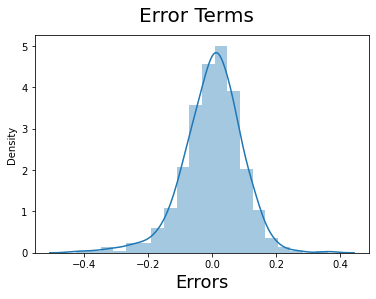

In [155]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Observation:

The error terms are Normally Distributed with mean = 0

## Step 8: Making Predictions Using the Final Model

Fitted the model and checked the normality of error terms. Now making predictions using the final, lm27

#### Applying the scaling on the test sets

In [156]:
num_vars = ['temp','humidity','windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [157]:
df_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,2,3,4,5,6,7,8,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558951,0.638506,0.313358,0.520592,0.255708,0.264840,0.232877,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233699,0.148973,0.159945,0.218435,0.437258,0.442259,0.423633,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046590,0.261918,-0.042803,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354653,0.527267,0.198534,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558716,0.627739,0.299461,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759117,0.743925,0.403051,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984440,1.002143,0.807483,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [158]:
y_test = df_test.pop('count')
X_test = df_test

In [159]:
# removing the "const" column from X_train_rfe_27 data set to get the required clumns for X_test
X_test_col = X_train_rfe_32.drop('const', axis = 1).columns
X_test_col

Index([                              'year',
                                  'holiday',
                                   'summer',
                                   'winter',
                                          8,
                                          9,
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                     'temp',
                                   'Monday',
                                  'Tuesday'],
      dtype='object')

In [160]:
X_test_new = X_test[X_test_col]
X_test_new.head(2)

,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,Monday,Tuesday
184,0,1,0,0,0,0,0,1,0.831783,0,0
535,1,0,1,0,0,0,0,0,0.901380,0,0


In [161]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test_new)
X_test_new.head(2)

,const,year,holiday,summer,winter,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,temp,Monday,Tuesday
184,1.0,0,1,0,0,0,0,0,1,0.831783,0,0
535,1.0,1,0,1,0,0,0,0,0,0.901380,0,0


### Making predictions on Test data

In [162]:
#Making predictions using the model lm27
y_pred = lm32.predict(X_test_new)

## Step 9: Model Evaluation

Now plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

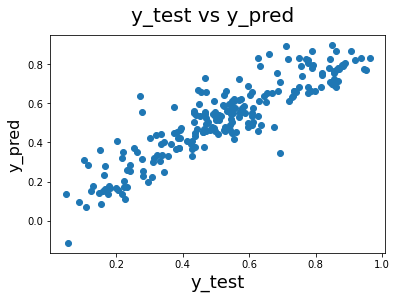

In [163]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### The model is able to explain the change in demand of the Bike rentals since the actual and predicted values are overlapping. That is there is a linear relationship between the Actual and Predicted values.

## Calculating the R-squared score on the test set

In [164]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.799190803688352

## Calculating the Adjusted R-squared score on the test set

In [165]:
n = X_test_new.shape[0]      # n is number of rows in X_test_new

p = X_test_new.shape[1]     # p= Number of features/predictors which is number of columns in X_test_new

# Calculating Adjusted R-squared value using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7874931806022366

## Calculating RMSE, MSE, MAE

In [166]:
# calculating the Mean Squared Error , Root Mean Squared Error and Mean Absolute error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.07478553116150692
MSE: 0.009537595062830619
RMSE: 0.09766061162429109


### Train and Test Datasets Comparison:

R-squared score:

   - Train : **82.7%**
   - Test  : **80%**

Adjusted R-squared score:

   - Train : **82.3%**
   - Test  : **79%**
    
    - The difference between the R-squared value for the train and test dataset is not more than 5% , therefore we can say that this is a good model .

    - The difference between the Adj R-squared value for the train and test dataset is not more than 5% , therefore we can say that this is a good model .


### F - Statistics


F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 216.3
Prob (F-statistic): 1.08e-181
The F-Statistics value of 216.3 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

# Validating the Assumptions in Multiple Linear Regression:

1) Linear Relationship between dependent and independent variables

2) Residuals are normally distributed

3) No multicollinearity

## 1) Linear Relationship between dependent and independent variables

In Step 2: "Data Visualisation", looking at the scatter plot of the numerical variables we could see that there is a linear relationship among "temp", "atemp" (Independent variables) and "count" (Dependent variable).

## 2) Normal distribution of Residuals

On step 7: "The Residual Analysis of the Training data set" it's already proved that the residuals are **Normally Distributed with mean Zero**

## 3) Checking the Multicollinearity

In [174]:
find_vif()

,Features,VIF
8,temp,4.19
0,year,1.95
2,summer,1.78
4,8,1.57
3,winter,1.49
7,Mist_cloudy,1.44
5,9,1.29
10,Tuesday,1.21
9,Monday,1.18
6,Light rain_Light snow_Thunderstorm,1.06


**Looking at the VIF values we can say that there is no Multicollinearity between predictor variables**

Hence all the three Assumptions in Multiple linear Regression is validated

In [170]:
print(lm32.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.3
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.08e-181
Time:                        21:04:55   Log-Likelihood:                 485.80
No. Observations:                 510   AIC:                            -947.6
Df Residuals:                     498   BIC:                            -896.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## Equation of the Best fit line is

$ count = 0.5391 \times temp + 0.2312 \times  year + 0.1476 \times winter + 0.1221 \times 9 + 0.0950 \times summer  + 0.0560 \times 8 - 0.1028  \times  holiday - 0.3002 \times Light rain Light snow Thunderstorm - 0.0821 \times Mist cloudy - 0.0297 \times  Monday - 0.0345  \times  Tuesday $


In the equation the numbers 8 and 9 corresponds to the months

- 8  - August
- 9  - September


## Insights:
### The  variables  that are significant in predicting the demand for shared bikes are the following ones

- The demand for the Bike Rentals increases with **temperature** 
- And also in each **year** the Bike Rental count is increasing 
- Demand increasing seasons: **Winter and Summer**
- Demand increasing months: **September and August**
- Demand decreasing days: **Monday and Tuesday**
- out of all the variables, Bike rentals is highly negatively correlated with these **weather conditions** : 
    - Light rain
    - Light snow
    - Thunder storm 
- **Holidays** have a negative correlation with the demand, it may be because people like to spend their holidays with family

# The Top Three

As per our final model the top 3 predictor variables that influences the demand for Bike rentals are 

   1) **"Temperature"**: It has a coefficient of '0.5391' indicating one unit increase in temperature increases the Bike rental count by '0.5391' units.
   
   2) **"Weather conditions"**: It has a coefficient of '− 0.3002' indicating one unit increase in Weather situation causes decrease in  the Bike rental count by '0.3002' units. These weather conditions include "Light rain", "Light snow" and "Thunder storm".
   
   3) **Year**: It has a coefficient of '0.2312' indicating, by each year the Demand for Bike rental is increasing by '0.2312' units.
   